
All Aadhaar activity was aggregated at the PIN–month level to ensure temporal consistency and reduce transaction-level noise.

In [2]:
import pandas as pd
final_df = pd.read_csv("../Dataset/final_df.csv")
# Ensure date is datetime
final_df["date"] = pd.to_datetime(final_df["date"], errors="coerce")

# Create month column (YYYY-MM)
final_df["month"] = final_df["date"].dt.to_period("M").astype(str)

# Ensure pincode is string and 6-digit
final_df["pincode"] = final_df["pincode"].astype(str).str.zfill(6)

# Aggregate at PIN–MONTH level
pin_month_df = (
    final_df
    .groupby(
        ["state", "district", "pincode", "month"],
        as_index=False
    )
    .agg({
        "enr_age_0_5": "sum",
        "enr_age_5_17": "sum",
        "enr_age_18_greater": "sum",
        "bio_age_5_17": "sum",
        "bio_age_17_greater": "sum",
        "demo_age_5_17": "sum",
        "demo_age_17_greater": "sum"
    })
)

# Optional: sort for readability
pin_month_df = pin_month_df.sort_values(
    ["state", "district", "pincode", "month"]
)

pin_month_df.head()


,state,district,pincode,month,enr_age_0_5,enr_age_5_17,enr_age_18_greater,bio_age_5_17,bio_age_17_greater,demo_age_5_17,demo_age_17_greater
0,Andaman And Nicobar Islands,Nicobar,744301,2025-03,0.0,0.0,0.0,101.0,48.0,16.0,180.0
1,Andaman And Nicobar Islands,Nicobar,744301,2025-04,0.0,0.0,0.0,28.0,41.0,0.0,0.0
2,Andaman And Nicobar Islands,Nicobar,744301,2025-05,0.0,0.0,0.0,13.0,15.0,0.0,0.0
3,Andaman And Nicobar Islands,Nicobar,744301,2025-06,0.0,0.0,0.0,19.0,29.0,0.0,0.0
4,Andaman And Nicobar Islands,Nicobar,744301,2025-07,0.0,0.0,0.0,23.0,40.0,0.0,0.0


# Adding total enrolment,bio and demo


In [4]:
pin_month_df["total_enrolment"] = (
    pin_month_df["enr_age_0_5"]
    + pin_month_df["enr_age_5_17"]
    + pin_month_df["enr_age_18_greater"]
)

pin_month_df["total_biographic"] = (
    pin_month_df["bio_age_5_17"]
    + pin_month_df["bio_age_17_greater"]
)

pin_month_df["total_demographic"] = (
    pin_month_df["demo_age_5_17"]
    + pin_month_df["demo_age_17_greater"]
)

pin_month_df["total_activity"] = (
    pin_month_df["total_enrolment"]
    + pin_month_df["total_biographic"]
    + pin_month_df["total_demographic"]
)

pin_month_df.head()



,state,district,pincode,month,enr_age_0_5,enr_age_5_17,enr_age_18_greater,bio_age_5_17,bio_age_17_greater,demo_age_5_17,demo_age_17_greater,total_enrolment,total_biographic,total_demographic,total_activity
0,Andaman And Nicobar Islands,Nicobar,744301,2025-03,0.0,0.0,0.0,101.0,48.0,16.0,180.0,0.0,149.0,196.0,345.0
1,Andaman And Nicobar Islands,Nicobar,744301,2025-04,0.0,0.0,0.0,28.0,41.0,0.0,0.0,0.0,69.0,0.0,69.0
2,Andaman And Nicobar Islands,Nicobar,744301,2025-05,0.0,0.0,0.0,13.0,15.0,0.0,0.0,0.0,28.0,0.0,28.0
3,Andaman And Nicobar Islands,Nicobar,744301,2025-06,0.0,0.0,0.0,19.0,29.0,0.0,0.0,0.0,48.0,0.0,48.0
4,Andaman And Nicobar Islands,Nicobar,744301,2025-07,0.0,0.0,0.0,23.0,40.0,0.0,0.0,0.0,63.0,0.0,63.0


# Age-Group Behaviour Signals

In [5]:

# Child Enrolment Share (0–5)

pin_month_df["child_enrol_share"] = (
    pin_month_df["enr_age_0_5"] / pin_month_df["total_enrolment"]
)

# Replace invalid values (division by zero cases)
pin_month_df["child_enrol_share"] = (
    pin_month_df["child_enrol_share"]
    .replace([float("inf"), -float("inf")], 0)
    .fillna(0)
)


# School-age Update Share (5–17)

pin_month_df["school_update_share"] = (
    (pin_month_df["bio_age_5_17"] + pin_month_df["demo_age_5_17"]) /
    (pin_month_df["total_biographic"] + pin_month_df["total_demographic"])
)

pin_month_df["school_update_share"] = (
    pin_month_df["school_update_share"]
    .replace([float("inf"), -float("inf")], 0)
    .fillna(0)
)


# Adult Update Share (18+)

pin_month_df["adult_update_share"] = (
    (pin_month_df["bio_age_17_greater"] + pin_month_df["demo_age_17_greater"]) /
    (pin_month_df["total_biographic"] + pin_month_df["total_demographic"])
)

pin_month_df["adult_update_share"] = (
    pin_month_df["adult_update_share"]
    .replace([float("inf"), -float("inf")], 0)
    .fillna(0)
)
pin_month_df.head()

,state,district,pincode,month,enr_age_0_5,enr_age_5_17,enr_age_18_greater,bio_age_5_17,bio_age_17_greater,demo_age_5_17,demo_age_17_greater,total_enrolment,total_biographic,total_demographic,total_activity,child_enrol_share,school_update_share,adult_update_share
0,Andaman And Nicobar Islands,Nicobar,744301,2025-03,0.0,0.0,0.0,101.0,48.0,16.0,180.0,0.0,149.0,196.0,345.0,0.0,0.339130,0.660870
1,Andaman And Nicobar Islands,Nicobar,744301,2025-04,0.0,0.0,0.0,28.0,41.0,0.0,0.0,0.0,69.0,0.0,69.0,0.0,0.405797,0.594203
2,Andaman And Nicobar Islands,Nicobar,744301,2025-05,0.0,0.0,0.0,13.0,15.0,0.0,0.0,0.0,28.0,0.0,28.0,0.0,0.464286,0.535714
3,Andaman And Nicobar Islands,Nicobar,744301,2025-06,0.0,0.0,0.0,19.0,29.0,0.0,0.0,0.0,48.0,0.0,48.0,0.0,0.395833,0.604167
4,Andaman And Nicobar Islands,Nicobar,744301,2025-07,0.0,0.0,0.0,23.0,40.0,0.0,0.0,0.0,63.0,0.0,63.0,0.0,0.365079,0.634921


# Enrolment vs Update Balance 

In [6]:

# Enrolment Share
pin_month_df["enrolment_share"] = (
    pin_month_df["total_enrolment"] / pin_month_df["total_activity"]
)

pin_month_df["enrolment_share"] = (
    pin_month_df["enrolment_share"]
    .replace([float("inf"), -float("inf")], 0)
    .fillna(0)
)


# Update Share

pin_month_df["update_share"] = (
    (pin_month_df["total_biographic"] + pin_month_df["total_demographic"]) /
    pin_month_df["total_activity"]
)

pin_month_df["update_share"] = (
    pin_month_df["update_share"]
    .replace([float("inf"), -float("inf")], 0)
    .fillna(0)
)
pin_month_df

,state,district,pincode,month,enr_age_0_5,enr_age_5_17,enr_age_18_greater,bio_age_5_17,bio_age_17_greater,demo_age_5_17,demo_age_17_greater,total_enrolment,total_biographic,total_demographic,total_activity,child_enrol_share,school_update_share,adult_update_share,enrolment_share,update_share
0,Andaman And Nicobar Islands,Nicobar,744301,2025-03,0.0,0.0,0.0,101.0,48.0,16.0,180.0,0.0,149.0,196.0,345.0,0.0,0.339130,0.660870,0.000000,1.000000
1,Andaman And Nicobar Islands,Nicobar,744301,2025-04,0.0,0.0,0.0,28.0,41.0,0.0,0.0,0.0,69.0,0.0,69.0,0.0,0.405797,0.594203,0.000000,1.000000
2,Andaman And Nicobar Islands,Nicobar,744301,2025-05,0.0,0.0,0.0,13.0,15.0,0.0,0.0,0.0,28.0,0.0,28.0,0.0,0.464286,0.535714,0.000000,1.000000
3,Andaman And Nicobar Islands,Nicobar,744301,2025-06,0.0,0.0,0.0,19.0,29.0,0.0,0.0,0.0,48.0,0.0,48.0,0.0,0.395833,0.604167,0.000000,1.000000
4,Andaman And Nicobar Islands,Nicobar,744301,2025-07,0.0,0.0,0.0,23.0,40.0,0.0,0.0,0.0,63.0,0.0,63.0,0.0,0.365079,0.634921,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177566,West Bengal,hooghly,712706,2025-12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,1.000000
177567,West Bengal,nadia,742121,2025-09,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,3.0,5.0,1.0,0.000000,1.000000,0.200000,0.800000
177568,West Bengal,nadia,742121,2025-10,1.0,1.0,0.0,0.0,3.0,0.0,4.0,2.0,3.0,4.0,9.0,0.5,0.000000,1.000000,0.222222,0.777778
177569,West Bengal,nadia,742121,2025-11,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0,0.333333,0.666667,0.000000,1.000000


# Stability / Volatility (Month-to-Month Behaviour)

In [7]:

# Sort data so months are in correct order
pin_month_df = pin_month_df.sort_values(
    ["state", "district", "pincode", "month"]
)

# Month-to-month change in TOTAL ACTIVITY
pin_month_df["activity_change"] = (
    pin_month_df
    .groupby(["state", "district", "pincode"])["total_activity"]
    .pct_change()
)

# Month-to-month change in ENROLMENT
pin_month_df["enrolment_change"] = (
    pin_month_df
    .groupby(["state", "district", "pincode"])["total_enrolment"]
    .pct_change()
)

# Month-to-month change in UPDATES
pin_month_df["update_change"] = (
    pin_month_df
    .groupby(["state", "district", "pincode"])["update_share"]
    .pct_change()
)

# Replace missing values (first month has no previous month)
pin_month_df[[
    "activity_change",
    "enrolment_change",
    "update_change"
]] = (
    pin_month_df[[
        "activity_change",
        "enrolment_change",
        "update_change"
    ]]
    .replace([float("inf"), -float("inf")], 0)
    .fillna(0)
)
pin_month_df


,state,district,pincode,month,enr_age_0_5,enr_age_5_17,enr_age_18_greater,bio_age_5_17,bio_age_17_greater,demo_age_5_17,...,total_demographic,total_activity,child_enrol_share,school_update_share,adult_update_share,enrolment_share,update_share,activity_change,enrolment_change,update_change
0,Andaman And Nicobar Islands,Nicobar,744301,2025-03,0.0,0.0,0.0,101.0,48.0,16.0,...,196.0,345.0,0.0,0.339130,0.660870,0.000000,1.000000,0.000000,0.0,0.000000
1,Andaman And Nicobar Islands,Nicobar,744301,2025-04,0.0,0.0,0.0,28.0,41.0,0.0,...,0.0,69.0,0.0,0.405797,0.594203,0.000000,1.000000,-0.800000,0.0,0.000000
2,Andaman And Nicobar Islands,Nicobar,744301,2025-05,0.0,0.0,0.0,13.0,15.0,0.0,...,0.0,28.0,0.0,0.464286,0.535714,0.000000,1.000000,-0.594203,0.0,0.000000
3,Andaman And Nicobar Islands,Nicobar,744301,2025-06,0.0,0.0,0.0,19.0,29.0,0.0,...,0.0,48.0,0.0,0.395833,0.604167,0.000000,1.000000,0.714286,0.0,0.000000
4,Andaman And Nicobar Islands,Nicobar,744301,2025-07,0.0,0.0,0.0,23.0,40.0,0.0,...,0.0,63.0,0.0,0.365079,0.634921,0.000000,1.000000,0.312500,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177566,West Bengal,hooghly,712706,2025-12,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.000000,1.000000,0.000000,1.000000,-0.666667,0.0,0.000000
177567,West Bengal,nadia,742121,2025-09,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,5.0,1.0,0.000000,1.000000,0.200000,0.800000,0.000000,0.0,0.000000
177568,West Bengal,nadia,742121,2025-10,1.0,1.0,0.0,0.0,3.0,0.0,...,4.0,9.0,0.5,0.000000,1.000000,0.222222,0.777778,0.800000,1.0,-0.027778
177569,West Bengal,nadia,742121,2025-11,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.333333,0.666667,0.000000,1.000000,-0.666667,-1.0,0.285714


In [8]:
pin_month_df[[
    "activity_change",
    "enrolment_change",
    "update_change"
]].describe()

,activity_change,enrolment_change,update_change
count,177571.000000,177571.000000,177571.000000
mean,0.158851,0.002558,0.000135
std,0.748411,0.630318,0.135101
min,-1.000000,-1.000000,-1.000000
25%,-0.191781,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.326713,0.000000,0.000000
max,42.258065,34.000000,11.969496


In [9]:
[col for col in pin_month_df.columns if "district_" in col]


[]

District-Relative Comparison

In [10]:
# ----------------------------------
# STEP 8: DISTRICT-RELATIVE COMPARISON
# ----------------------------------

# 1️⃣ Calculate district-level monthly averages
district_month_avg = (
    pin_month_df
    .groupby(["state", "district", "month"], as_index=False)
    .agg({
        "enrolment_share": "mean",
        "update_share": "mean",
        "activity_change": "mean"
    })
    .rename(columns={
        "enrolment_share": "district_enrolment_share",
        "update_share": "district_update_share",
        "activity_change": "district_activity_change"
    })
)

# 2️⃣ Merge district averages back to PIN-level data
pin_month_df = pin_month_df.merge(
    district_month_avg,
    on=["state", "district", "month"],
    how="left"
)

# 3️⃣ Compare PIN behaviour to district behaviour

# Enrolment performance vs district
pin_month_df["enrolment_vs_district"] = (
    pin_month_df["enrolment_share"]
    - pin_month_df["district_enrolment_share"]
)

# Update pressure vs district
pin_month_df["update_vs_district"] = (
    pin_month_df["update_share"]
    - pin_month_df["district_update_share"]
)

# Volatility vs district
pin_month_df["volatility_vs_district"] = (
    pin_month_df["activity_change"]
    - pin_month_df["district_activity_change"]
)


In [11]:
pin_month_df

,state,district,pincode,month,enr_age_0_5,enr_age_5_17,enr_age_18_greater,bio_age_5_17,bio_age_17_greater,demo_age_5_17,...,update_share,activity_change,enrolment_change,update_change,district_enrolment_share,district_update_share,district_activity_change,enrolment_vs_district,update_vs_district,volatility_vs_district
0,Andaman And Nicobar Islands,Nicobar,744301,2025-03,0.0,0.0,0.0,101.0,48.0,16.0,...,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,Andaman And Nicobar Islands,Nicobar,744301,2025-04,0.0,0.0,0.0,28.0,41.0,0.0,...,1.000000,-0.800000,0.0,0.000000,0.000000,1.000000,0.346195,0.000000,0.000000,-1.146195
2,Andaman And Nicobar Islands,Nicobar,744301,2025-05,0.0,0.0,0.0,13.0,15.0,0.0,...,1.000000,-0.594203,0.0,0.000000,0.000000,1.000000,-0.483042,0.000000,0.000000,-0.111161
3,Andaman And Nicobar Islands,Nicobar,744301,2025-06,0.0,0.0,0.0,19.0,29.0,0.0,...,1.000000,0.714286,0.0,0.000000,0.000000,1.000000,0.610568,0.000000,0.000000,0.103717
4,Andaman And Nicobar Islands,Nicobar,744301,2025-07,0.0,0.0,0.0,23.0,40.0,0.0,...,1.000000,0.312500,0.0,0.000000,0.000000,1.000000,0.667557,0.000000,0.000000,-0.355057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177566,West Bengal,hooghly,712706,2025-12,0.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,-0.666667,0.0,0.000000,0.073232,0.926768,0.056410,-0.073232,0.073232,-0.723077
177567,West Bengal,nadia,742121,2025-09,1.0,0.0,0.0,0.0,1.0,0.0,...,0.800000,0.000000,0.0,0.000000,0.200000,0.800000,0.000000,0.000000,0.000000,0.000000
177568,West Bengal,nadia,742121,2025-10,1.0,1.0,0.0,0.0,3.0,0.0,...,0.777778,0.800000,1.0,-0.027778,0.222222,0.777778,0.800000,0.000000,0.000000,0.000000
177569,West Bengal,nadia,742121,2025-11,0.0,0.0,0.0,0.0,1.0,1.0,...,1.000000,-0.666667,-1.0,0.285714,0.000000,1.000000,-0.666667,0.000000,0.000000,0.000000


# Persistence & Risk Scoring

Bad-month flags


In [12]:

# 1️⃣ Low enrolment flag
# If enrolment is far below district average
pin_month_df["flag_low_enrolment"] = (
    pin_month_df["enrolment_vs_district"] < -0.20
)

# 2️⃣ High update pressure flag
# If update pressure is much higher than district
pin_month_df["flag_high_update"] = (
    pin_month_df["update_vs_district"] > 0.20
)

# 3️⃣ High volatility flag
# If activity is much more unstable than district
pin_month_df["flag_high_volatility"] = (
    pin_month_df["volatility_vs_district"].abs() > 0.50
)
pin_month_df.head(5)

,state,district,pincode,month,enr_age_0_5,enr_age_5_17,enr_age_18_greater,bio_age_5_17,bio_age_17_greater,demo_age_5_17,...,update_change,district_enrolment_share,district_update_share,district_activity_change,enrolment_vs_district,update_vs_district,volatility_vs_district,flag_low_enrolment,flag_high_update,flag_high_volatility
0,Andaman And Nicobar Islands,Nicobar,744301,2025-03,0.0,0.0,0.0,101.0,48.0,16.0,...,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,False,False,False
1,Andaman And Nicobar Islands,Nicobar,744301,2025-04,0.0,0.0,0.0,28.0,41.0,0.0,...,0.0,0.0,1.0,0.346195,0.0,0.0,-1.146195,False,False,True
2,Andaman And Nicobar Islands,Nicobar,744301,2025-05,0.0,0.0,0.0,13.0,15.0,0.0,...,0.0,0.0,1.0,-0.483042,0.0,0.0,-0.111161,False,False,False
3,Andaman And Nicobar Islands,Nicobar,744301,2025-06,0.0,0.0,0.0,19.0,29.0,0.0,...,0.0,0.0,1.0,0.610568,0.0,0.0,0.103717,False,False,False
4,Andaman And Nicobar Islands,Nicobar,744301,2025-07,0.0,0.0,0.0,23.0,40.0,0.0,...,0.0,0.0,1.0,0.667557,0.0,0.0,-0.355057,False,False,False


Bad months count

In [13]:


pin_risk_summary = (
    pin_month_df
    .groupby(["state", "district", "pincode"])
    .agg(
        low_enrol_months=("flag_low_enrolment", "sum"),
        high_update_months=("flag_high_update", "sum"),
        high_volatility_months=("flag_high_volatility", "sum"),
        total_months=("month", "nunique")
    )
    .reset_index()
)


Risk Classification

In [14]:

# Total number of bad months (any issue)
pin_risk_summary["total_bad_months"] = (
    pin_risk_summary["low_enrol_months"]
    + pin_risk_summary["high_update_months"]
    + pin_risk_summary["high_volatility_months"]
)

# Assign risk level
def classify_risk(x):
    if x >= 3:
        return "High"
    elif x >= 1:
        return "Medium"
    else:
        return "Low"

pin_risk_summary["risk_level"] = (
    pin_risk_summary["total_bad_months"]
    .apply(classify_risk)
)


In [15]:
pin_risk_summary["risk_level"].value_counts()


risk_level
Medium    12712
Low        7773
High       2919
Name: count, dtype: int64

Out of 23,404 PIN codes analysed, approximately 12% were classified as high risk due to persistent Aadhaar service gaps observed across multiple months. A further 54% were identified as medium risk, indicating early signs of enrolment or update-related stress. The remaining PIN codes displayed stable Aadhaar activity and were categorized as low risk. This distribution highlights the value of a PIN-level early warning system that enables preventive intervention before service gaps become critical.

In [16]:
pin_risk_summary.head(100)

,state,district,pincode,low_enrol_months,high_update_months,high_volatility_months,total_months,total_bad_months,risk_level
0,Andaman And Nicobar Islands,Nicobar,744301,0,0,4,9,4,High
1,Andaman And Nicobar Islands,Nicobar,744302,0,0,4,9,4,High
2,Andaman And Nicobar Islands,Nicobar,744303,0,0,4,9,4,High
3,Andaman And Nicobar Islands,Nicobar,744304,0,0,4,6,4,High
4,Andaman And Nicobar Islands,North And Middle Andaman,744201,0,0,3,9,3,High
...,...,...,...,...,...,...,...,...,...
95,Andhra Pradesh,Anakapalli,531083,0,0,3,6,3,High
96,Andhra Pradesh,Anakapalli,531084,0,0,1,6,1,Medium
97,Andhra Pradesh,Anakapalli,531085,0,0,2,9,2,Medium
98,Andhra Pradesh,Anakapalli,531113,0,0,1,8,1,Medium


# Count High-Risk PIN Codes per District

In [17]:
high_risk_pins = pin_risk_summary[
    pin_risk_summary["risk_level"] == "High"
]
medium_risk_pins = pin_risk_summary[
    pin_risk_summary["risk_level"] == "Medium"
]
low_risk_pins = pin_risk_summary[
    pin_risk_summary["risk_level"] == "Low"
]


In [18]:
low_risk_pins

,state,district,pincode,low_enrol_months,high_update_months,high_volatility_months,total_months,total_bad_months,risk_level
11,Andaman And Nicobar Islands,North And Middle Andaman,744211,0,0,0,1,0,Low
22,Andaman And Nicobar Islands,South Andaman,744210,0,0,0,1,0,Low
30,Andhra Pradesh,Alluri Sitharama Raju,507135,0,0,0,8,0,Low
31,Andhra Pradesh,Alluri Sitharama Raju,531024,0,0,0,9,0,Low
42,Andhra Pradesh,Alluri Sitharama Raju,531114,0,0,0,1,0,Low
...,...,...,...,...,...,...,...,...,...
23372,West Bengal,South 24 parganas,743331,0,0,0,3,0,Low
23373,West Bengal,South 24 parganas,743368,0,0,0,4,0,Low
23399,West Bengal,hooghly,712401,0,0,0,4,0,Low
23401,West Bengal,hooghly,712701,0,0,0,4,0,Low


Count category Risk PINs per District

In [19]:
district_high_risk_count = (
    high_risk_pins
    .groupby(["state", "district"])
    .agg(
        high_risk_pincode_count=("pincode", "nunique")
    )
    .reset_index()
)
district_medium_risk_count = (
    medium_risk_pins    
    .groupby(["state", "district"])
    .agg(
        medium_risk_pincode_count=("pincode", "nunique")
    )           
    .reset_index()
)
district_low_risk_count = (
    low_risk_pins
    .groupby(["state", "district"])
    .agg(
        low_risk_pincode_count=("pincode", "nunique")
    )
    .reset_index()
)

Sort descending


In [20]:
district_high_risk_count = district_high_risk_count.sort_values(
    by="high_risk_pincode_count",
    ascending=False
)
district_medium_risk_count = district_medium_risk_count.sort_values(
    by="medium_risk_pincode_count",
    ascending=False
)
district_low_risk_count = district_low_risk_count.sort_values(
    by="low_risk_pincode_count",                        
    ascending=False     
)   

In [21]:
district_high_risk_count.head(10)


,state,district,high_risk_pincode_count
48,Assam,Kamrup,41
35,Assam,Cachar,40
201,Karnataka,Dakshina Kannada,30
20,Andhra Pradesh,Sri Potti Sriramulu Nellore,25
23,Andhra Pradesh,Tirupati,25
49,Assam,Karbi Anglong,24
139,Gujarat,Surat,24
399,Tamil Nadu,Chengalpattu,23
57,Assam,Tinsukia,23
540,West Bengal,Purba Bardhaman,23


Analysis of PIN-level risk reveals that high-risk Aadhaar service gaps are geographically concentrated. Districts such as Kamrup and Cachar in Assam, Dakshina Kannada in Karnataka, and Surat in Gujarat account for a disproportionately high number of high-risk PIN codes. This suggests the need for targeted, district-level Aadhaar interventions rather than uniform state-wide strategies

A small number of districts account for a disproportionately large number of high-risk PIN codes, indicating concentrated Aadhaar service gaps that require district-level intervention.

# High Risk Districts Heatmap

In [22]:
import geopandas as gpd

india_districts = gpd.read_file("../Dataset/GeoJSON/india_district.geojson")


Matching names

In [23]:
# Lowercase + strip spaces for matching
india_districts["district_norm"] = (
    india_districts["NAME_2"]
    .str.lower()
    .str.strip()
)

district_high_risk_count["district_norm"] = (
    district_high_risk_count["district"]
    .str.lower()
    .str.strip()
)


In [24]:
high_risk_district_map_df = india_districts.merge(
    district_high_risk_count,
    on="district_norm",
    how="left"
)


In [25]:
high_risk_district_map_df["high_risk_pincode_count"] = (
    high_risk_district_map_df["high_risk_pincode_count"]
    .fillna(0)
)


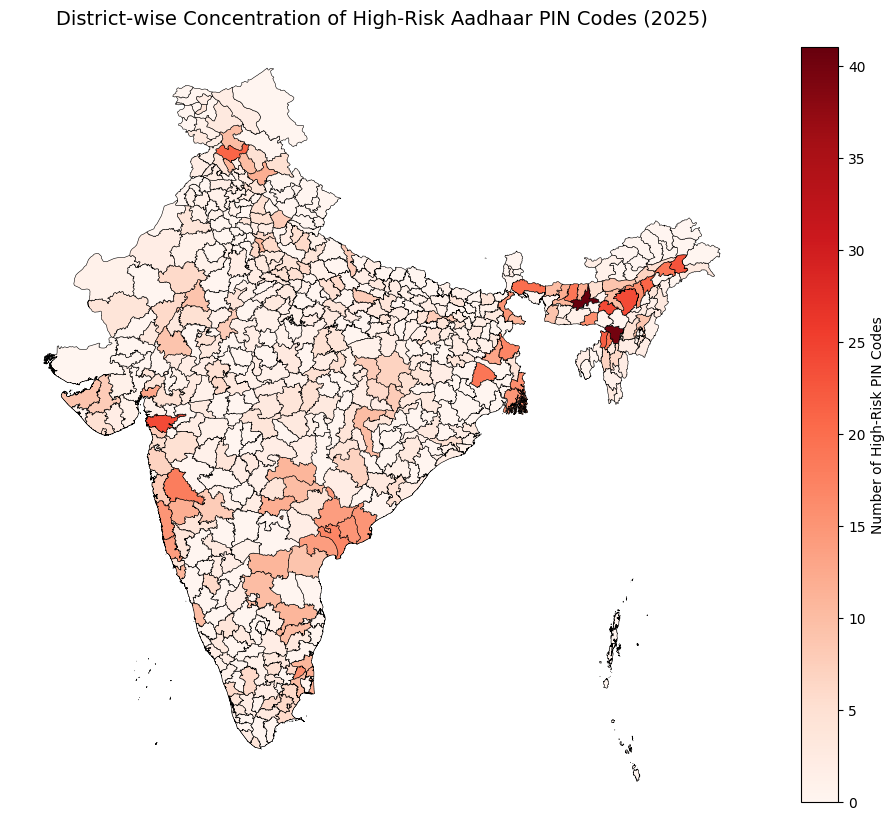

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 14))

high_risk_district_map_df.plot(
    column="high_risk_pincode_count",
    cmap="Reds",          # light → dark red
    linewidth=0.4,
    edgecolor="black",
    legend=True,
    ax=ax,
    legend_kwds={
        "label": "Number of High-Risk PIN Codes",
        "shrink": 0.7
    }
)

ax.set_title(
    "District-wise Concentration of High-Risk Aadhaar PIN Codes (2025)",
    fontsize=14
)

ax.axis("off")
plt.show()


# Medium Risk Districts Heatmap

In [27]:
# Lowercase + strip spaces for matching
india_districts["district_norm"] = (
    india_districts["NAME_2"]
    .str.lower()
    .str.strip()
)

district_medium_risk_count["district_norm"] = (
    district_medium_risk_count["district"]
    .str.lower()
    .str.strip()
)


In [28]:
medium_risk_district_map_df = india_districts.merge(
    district_medium_risk_count,
    on="district_norm",
    how="left"
)


In [29]:
medium_risk_district_map_df["medium_risk_pincode_count"] = (
    medium_risk_district_map_df["medium_risk_pincode_count"]
    .fillna(0)
)

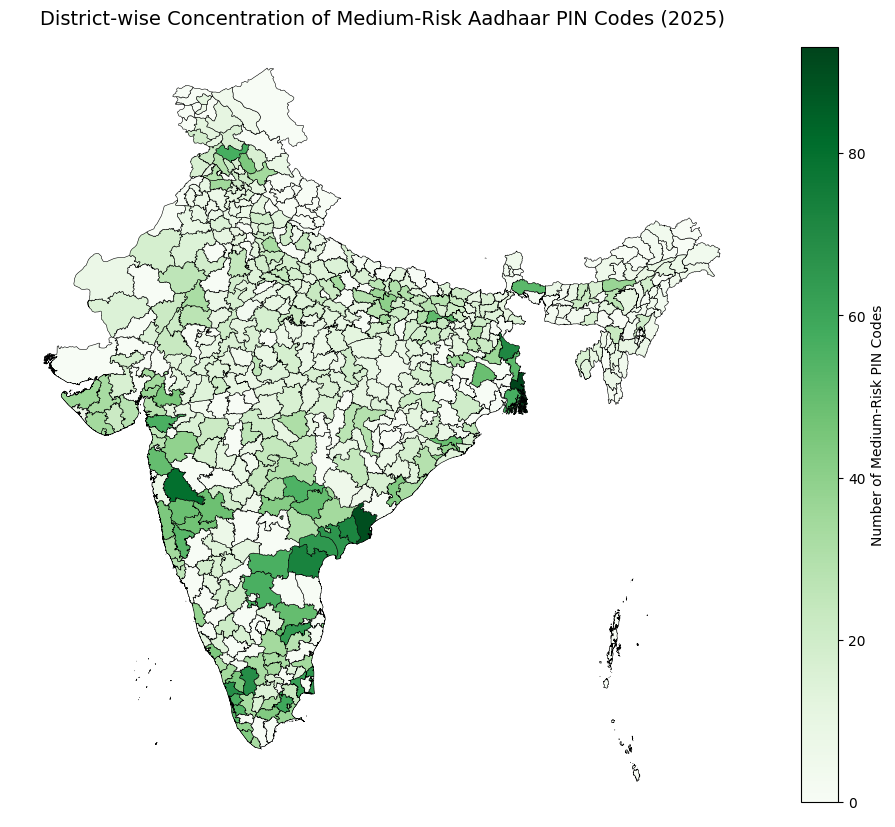

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 14))

medium_risk_district_map_df.plot(
    column="medium_risk_pincode_count",
    cmap="Greens",          # light → dark green
    linewidth=0.4,
    edgecolor="black",
    legend=True,
    ax=ax,
    legend_kwds={
        "label": "Number of Medium-Risk PIN Codes",
        "shrink": 0.7
    }
)

ax.set_title(
    "District-wise Concentration of Medium-Risk Aadhaar PIN Codes (2025)",
    fontsize=14
)

ax.axis("off")
plt.show()


# Surat high risk pin analysis

In [35]:
surat_df = pin_month_df[
    pin_month_df["district"] == "Surat"
]


In [36]:
surat_high_risk_pins = pin_risk_summary[
    (pin_risk_summary["district"] == "Surat") &
    (pin_risk_summary["risk_level"] == "High")
]


In [37]:
surat_high_risk_detail = surat_df.merge(
    surat_high_risk_pins[["pincode"]],
    on="pincode",
    how="inner"
)


In [38]:
surat_reason_counts = {
    "Low Enrolment": surat_high_risk_detail["flag_low_enrolment"].sum(),
    "High Update Pressure": surat_high_risk_detail["flag_high_update"].sum(),
    "High Volatility": surat_high_risk_detail["flag_high_volatility"].sum()
}

surat_reason_counts


{'Low Enrolment': np.int64(0),
 'High Update Pressure': np.int64(0),
 'High Volatility': np.int64(86)}

# Kamrup High Risk Pincodes


In [39]:
kamrup_df = pin_month_df[
    (pin_month_df["state"] == "Assam") &
    (pin_month_df["district"] == "Kamrup")
]


In [40]:
kamrup_high_risk_pins = pin_risk_summary[
    (pin_risk_summary["district"] == "Kamrup") &
    (pin_risk_summary["risk_level"] == "High")
]

In [41]:
kamrup_high_risk_detail = kamrup_df.merge(
    kamrup_high_risk_pins[["pincode"]],
    on="pincode",
    how="inner"
)


In [43]:
kamrup_reason_counts = {
    "Low Enrolment": kamrup_high_risk_detail["flag_low_enrolment"].sum(),
    "High Update Pressure": kamrup_high_risk_detail["flag_high_update"].sum(),
    "High Volatility": kamrup_high_risk_detail["flag_high_volatility"].sum()
}

kamrup_reason_counts

{'Low Enrolment': np.int64(26),
 'High Update Pressure': np.int64(26),
 'High Volatility': np.int64(135)}

Count the no of months a pin is high


In [45]:
kamrup_pin_reason_summary = (
    kamrup_df
    .groupby("pincode")
    .agg(
        low_enrolment_months=("flag_low_enrolment", "sum"),
        high_update_months=("flag_high_update", "sum"),
        high_volatility_months=("flag_high_volatility", "sum"),
        total_months=("month", "nunique")
    )
    .reset_index()
)


In [46]:
kamrup_pin_reason_summary

,pincode,low_enrolment_months,high_update_months,high_volatility_months,total_months
0,781001,2,2,2,4
1,781003,0,0,4,4
2,781004,0,0,2,2
3,781006,0,0,3,4
4,781007,0,0,3,4
...,...,...,...,...,...
61,781376,1,1,3,9
62,781380,0,0,2,9
63,781381,0,0,3,9
64,781382,1,1,5,7


Classify PINs by dominant reason

In [47]:
def classify_pin_reason(row):
    if row["high_volatility_months"] >= max(
        row["low_enrolment_months"],
        row["high_update_months"]
    ) and row["high_volatility_months"] > 0:
        return "Volatility-driven"
    elif row["high_update_months"] > row["low_enrolment_months"]:
        return "Update-pressure-driven"
    elif row["low_enrolment_months"] > 0:
        return "Enrolment-gap-driven"
    else:
        return "Mixed / Low issue"

kamrup_pin_reason_summary["dominant_reason"] = (
    kamrup_pin_reason_summary.apply(classify_pin_reason, axis=1)
)


In [48]:
kamrup_pin_reason_summary["dominant_reason"].value_counts()


dominant_reason
Volatility-driven    63
Mixed / Low issue     3
Name: count, dtype: int64

Pin list

In [50]:
volatile_pins = kamrup_pin_reason_summary[
    kamrup_pin_reason_summary["dominant_reason"] == "Volatility-driven"
]["pincode"].tolist()
volatile_pins

['781001',
 '781003',
 '781004',
 '781006',
 '781007',
 '781008',
 '781009',
 '781011',
 '781012',
 '781013',
 '781014',
 '781015',
 '781016',
 '781017',
 '781018',
 '781019',
 '781020',
 '781021',
 '781022',
 '781024',
 '781025',
 '781026',
 '781028',
 '781029',
 '781030',
 '781031',
 '781032',
 '781034',
 '781035',
 '781036',
 '781037',
 '781038',
 '781039',
 '781101',
 '781102',
 '781103',
 '781104',
 '781120',
 '781121',
 '781122',
 '781123',
 '781124',
 '781125',
 '781127',
 '781128',
 '781129',
 '781131',
 '781132',
 '781134',
 '781135',
 '781136',
 '781137',
 '781141',
 '781171',
 '781350',
 '781354',
 '781364',
 '781365',
 '781366',
 '781376',
 '781380',
 '781381',
 '781382']

In [52]:
update_pins = kamrup_pin_reason_summary[
    kamrup_pin_reason_summary["dominant_reason"] == "Update-pressure-driven"
]["pincode"].tolist()
update_pins

[]

In [59]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load district boundaries
district_gdf = gpd.read_file("../Dataset/GeoJSON/india_district.geojson")

# Load PIN boundaries
pincode_gdf = gpd.read_file("../Dataset/GeoJSON/india_pincode.geojson")

In [61]:
kamrup_district = district_gdf[
    (district_gdf["NAME_2"].str.lower() == "kamrup")
]
kamrup_district

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry
51,105,IND,India,4,Assam,52,Kamrup,None,"Kampur, Ramrup",District,District,"POLYGON ((91.95339 26.25504, 91.95743 26.24916..."


In [62]:
kamrup_df = pin_month_df[
    (pin_month_df["state"] == "Assam") &
    (pin_month_df["district"] == "Kamrup")
]

kamrup_low_enrol_pins = (
    kamrup_df
    .groupby("pincode")["flag_low_enrolment"]
    .any()
)

kamrup_low_enrol_pins = kamrup_low_enrol_pins[kamrup_low_enrol_pins].index.tolist()


In [63]:
pincode_gdf["pincode"] = (
    pincode_gdf["Pincode"]
    .astype(str)
    .str.zfill(6)
)
kamrup_low_enrol_gdf = pincode_gdf[
    pincode_gdf["pincode"].isin(kamrup_low_enrol_pins)
]


In [64]:
kamrup_low_enrol_gdf = gpd.clip(
    kamrup_low_enrol_gdf,
    kamrup_district
)


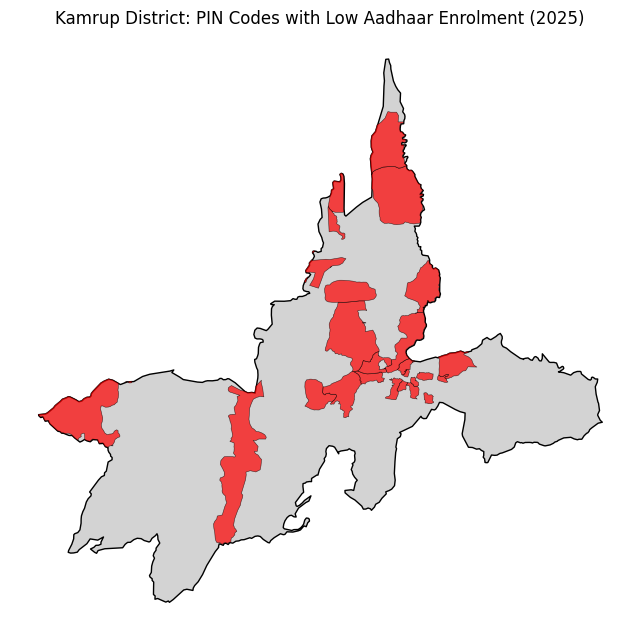

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Kamrup district boundary
kamrup_district.plot(
    ax=ax,
    color="lightgrey",
    edgecolor="black",
    linewidth=1
)

# Overlay low-enrolment PINs
kamrup_low_enrol_gdf.plot(
    ax=ax,
    color="red",
    edgecolor="black",
    linewidth=0.4,
    alpha=0.7
)

ax.set_title(
    "Kamrup District: PIN Codes with Low Aadhaar Enrolment (2025)",
    fontsize=12
)

ax.axis("off")
plt.show()


In [66]:
kamrup_high_update_pins = (
    kamrup_df
    .groupby("pincode")["flag_high_update"]
    .any()
)

kamrup_high_update_pins = kamrup_high_update_pins[
    kamrup_high_update_pins
].index.tolist()



In [67]:
kamrup_high_update_gdf = pincode_gdf[
    pincode_gdf["pincode"].isin(kamrup_high_update_pins)
]


In [68]:
kamrup_high_update_gdf = gpd.clip(
    kamrup_high_update_gdf,
    kamrup_district
)


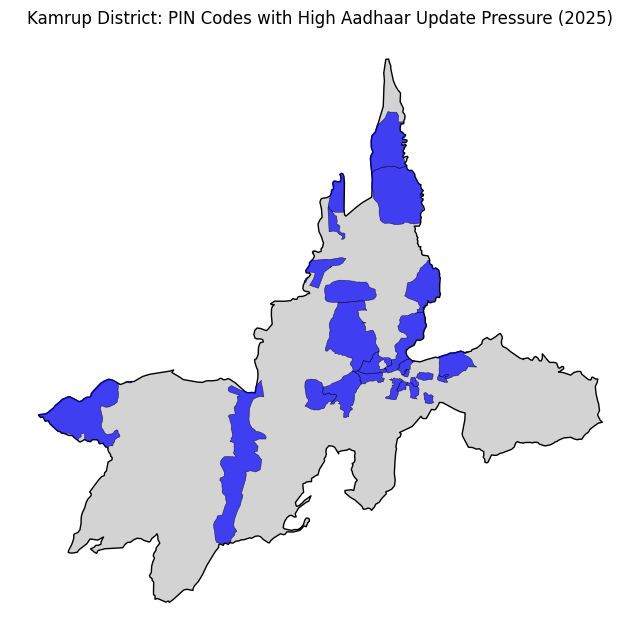

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Kamrup boundary
kamrup_district.plot(
    ax=ax,
    color="lightgrey",
    edgecolor="black",
    linewidth=1
)

# Overlay high-update PINs
kamrup_high_update_gdf.plot(
    ax=ax,
    color="blue",
    edgecolor="black",
    linewidth=0.4,
    alpha=0.7
)

ax.set_title(
    "Kamrup District: PIN Codes with High Aadhaar Update Pressure (2025)",
    fontsize=12
)

ax.axis("off")
plt.show()


Spatial mapping reveals substantial overlap between PIN codes experiencing low enrolment and those experiencing high update pressure in Kamrup district. This indicates that the same localities face multiple Aadhaar service stresses across different months, rather than distinct enrolment-only or update-only zones.

# Kamrup persistent problems summary of pin codes

In [76]:
# Persistent low enrolment PINs
low_enrol_persistent = (
    kamrup_df
    .groupby("pincode")["flag_low_enrolment"]
    .sum()
)

low_enrol_persistent = set(
    low_enrol_persistent[low_enrol_persistent >= 1].index
)

# Persistent high update PINs
high_update_persistent = (
    kamrup_df
    .groupby("pincode")["flag_high_update"]
    .sum()
)

high_update_persistent = set(
    high_update_persistent[high_update_persistent >= 1].index
)


In [77]:
def pin_category(pincode):
    if (pincode in low_enrol_persistent) and (pincode in high_update_persistent):
        return "Both"
    elif pincode in low_enrol_persistent:
        return "Low Enrolment"
    elif pincode in high_update_persistent:
        return "High Update"
    else:
        return "Other"


In [78]:
pincode_gdf["pincode"] = (
    pincode_gdf["Pincode"]
    .astype(str)
    .str.zfill(6)
)

kamrup_pin_map = pincode_gdf[
    pincode_gdf["pincode"].isin(
        low_enrol_persistent.union(high_update_persistent)
    )
].copy()

kamrup_pin_map["category"] = kamrup_pin_map["pincode"].apply(pin_category)


In [79]:
kamrup_pin_map = gpd.clip(
    kamrup_pin_map,
    kamrup_district
)


C:\Users\Soumyadeep Basu\AppData\Local\Temp\ipykernel_2708\1334459007.py:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(title="PIN Category")
C:\Users\Soumyadeep Basu\AppData\Local\Temp\ipykernel_2708\1334459007.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="PIN Category")


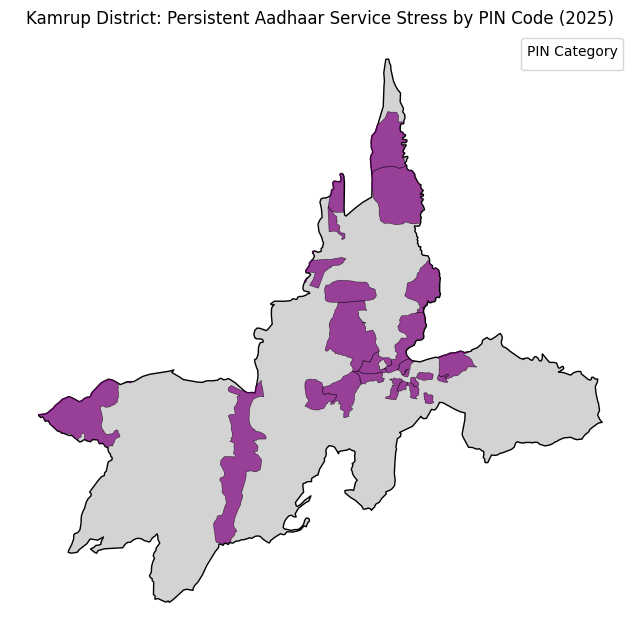

In [80]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot district boundary
kamrup_district.plot(
    ax=ax,
    color="lightgrey",
    edgecolor="black",
    linewidth=1
)

# Color map
color_map = {
    "Low Enrolment": "red",
    "High Update": "blue",
    "Both": "purple"
}

for category, color in color_map.items():
    subset = kamrup_pin_map[kamrup_pin_map["category"] == category]
    if not subset.empty:
        subset.plot(
            ax=ax,
            color=color,
            edgecolor="black",
            linewidth=0.4,
            alpha=0.7,
            label=category
        )

ax.set_title(
    "Kamrup District: Persistent Aadhaar Service Stress by PIN Code (2025)",
    fontsize=12
)

ax.legend(title="PIN Category")
ax.axis("off")
plt.show()


“Kamrup district does not suffer from a single, uniform Aadhaar problem. Instead, a large number of PIN codes experience recurring but alternating stresses—sometimes low enrolment, sometimes update overload—across multiple months. This indicates systemic instability rather than isolated access or capacity failures.”

# Tirupati High Risk Analysis

In [81]:
tirupati_df = pin_month_df[
    (pin_month_df["state"] == "Andhra Pradesh") &               
    (pin_month_df["district"] == "Tirupati")
]


In [82]:
tirupati_high_risk_pins = pin_risk_summary[
    (pin_risk_summary["district"] == "Tirupati") &
    (pin_risk_summary["risk_level"] == "High")
]


In [83]:
tirupati_high_risk_detail = tirupati_df.merge(
    tirupati_high_risk_pins[["pincode"]], on="pincode", how="inner"
)

In [84]:
tirupati_reason_counts = {
    "Low Enrolment": tirupati_high_risk_detail["flag_low_enrolment"].sum(),
    "High Update Pressure": tirupati_high_risk_detail["flag_high_update"].sum(),
    "High Volatility": tirupati_high_risk_detail["flag_high_volatility"].sum()
}       
tirupati_reason_counts

{'Low Enrolment': np.int64(3),
 'High Update Pressure': np.int64(3),
 'High Volatility': np.int64(83)}